In [1]:
import os
from io import open 

"""Writing the data per file into a dictionary for which the key is the category of news"""

import unicodedata
import string

all_letters = string.ascii_letters + ".,;'& "
n_letters = len(all_letters)

def unitoAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

def readFile_byline(filename):
    line_of_news = open("news_data_test/"+filename , encoding = 'utf-8').read().split('\n')    
    return [unitoAscii(line) for line in line_of_news]

In [2]:
category_news = {}
all_categories = []

list_of_files = os.listdir("news_data_test/")

#Dictionary which maps every category of news to it's description
for _file in list_of_files:
    category = _file.split(".")[0]
    all_categories.append(category)
    news_descp = readFile_byline(_file)
    category_news[category] = news_descp

num_categories = len(all_categories)
print(num_categories)

count_of_news_category = {}
average_words_per_number_of_samples = []

#Counting news items per category of news 
for key in category_news.keys():
    item = category_news.get(key)
    number_of_news_items = len(item)
    count_of_news_category[key] = number_of_news_items
    count_of_words = 0
    for sentence in item:
        count_of_words += len(sentence.split(" "))
    average_words_per_number_of_samples.append(count_of_words/number_of_news_items)


38


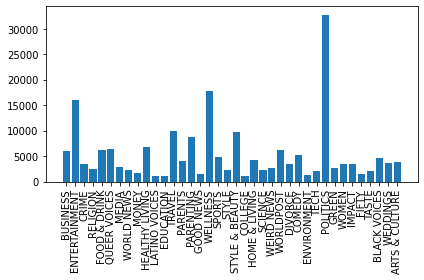

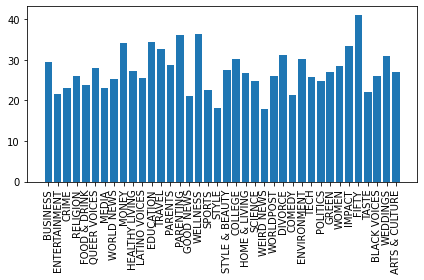

In [3]:
import random
import matplotlib
import matplotlib.pyplot as plt 

fig = plt.figure()
category = count_of_news_category.keys()
value = count_of_news_category.values()
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
#plt.savefig('Number_of_articles_per_category.png')
plt.show()

fig1 = plt.figure()
category = count_of_news_category.keys()
value = average_words_per_number_of_samples
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
#plt.savefig('Words_per_category.png')
plt.show()


In [4]:
import torch
import torch.nn as nn 
from torch import optim
import torch.nn.functional as F 

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
#print(device)

category_plus_news_list = []

for key in category_news.keys():
    for news_item in category_news[key]:
        category_plus_news_list.append((key, news_item))



In [5]:
from InferSentModel import InferSent
model_version = 2
MODEL_PATH = "encoder/infersent%s.pkl" % model_version
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': model_version}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))


use_cuda = True
model = model.to(torch.device('cuda:0')) if use_cuda else model

W2V_PATH = 'fastText/crawl-300d-2M.vec'
model.set_w2v_path(W2V_PATH)
model.build_vocab_k_words(K=1000000)

Vocab size : 1000000


In [6]:
list_of_sentences = []

labels =[]
count_of_lables=[]

for pair in category_plus_news_list:
    label = pair[0]
    sentences = pair[1]
    
    if len(sentences.split(" ")) >= 5:
    
        list_of_sentences.append(sentences)
        labels.append(label)
        
#print(list_of_sentences[0:20])
print(len(list_of_sentences))
#print((labels[0:20]))



198123


In [ ]:
#embeddings_business = model.encode(list_of_sentences_business, bsize=128, tokenize=False, verbose=True)
embeddings = model.encode(list_of_sentences, bsize=128, tokenize=False, verbose=True)
#embeddings_politics = model.encode(list_of_sentences_politics, bsize=128, tokenize=False, verbose=True)
#embeddings_religion = model.encode(list_of_sentences_religion, bsize=128, tokenize=False, verbose=True)
#embeddings_food = model.encode(list_of_sentences_food, bsize=128, tokenize=False, verbose=True)
#embeddings_home = model.encode(list_of_sentences_home, bsize=128, tokenize=False, verbose=True)
#print('nb sentences encoded : {0}'.format(len(embeddings_business)))
#print(embeddings_business.shape)
print('nb sentences encoded : {0}'.format(len(embeddings)))
print(embeddings.shape)

Nb words kept : 5263228/5825210 (90.4%)


/scratch/sidray/Attentive-recurrent-neural-networks-for-categorizing-and-generating-news/models.py:207: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sentences = np.array(sentences)[idx_sort]


In [ ]:
label_list = list(category_news.keys())
index_class_map_dict={}

for idx, value in enumerate(label_list):
    index_class_map_dict[value]=idx

print(index_class_map_dict)

In [ ]:
embedded_sentences = []

for index, embedding in enumerate(embeddings):
    input_vector = embedding
    target_vector = labels[index]
    target_class = index_class_map_dict[target_vector]
    embedded_sentences.append((input_vector, target_class))

    
#print(embedded_sentences[0][1])

In [ ]:
'''label_list = list(category_news.keys())

for label in labels:
    for idx, value in enumerate(label_list):
        if label == value:
            labels[labels.index(label)] = idx'''
            


In [ ]:
label_list = list(category_news.keys())
index_class_map=[]

for idx, value in enumerate(label_list):
    index_class_map.append((idx,value))

print(index_class_map)
    
    

In [ ]:
label_list = list(category_news.keys())
index_class_map=[]

for idx, value in enumerate(label_list):
    index_class_map.append((idx,value))

print(index_class_map)


label_list = list(category_news.keys())
index_class_map_dict={}

for idx, value in enumerate(label_list):
    index_class_map_dict[idx]=value

print(index_class_map_dict.keys())

    

In [ ]:
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

In [ ]:
import torch
torch.manual_seed(0)

import numpy as np
np.random.seed(0)

import random
random.seed(0)

In [ ]:
import math 
class SNNLinear(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.fc = nn.Linear(input_size, output_size)
        nn.init.normal_(self.fc.weight, std = math.sqrt(1/input_size))
        
    def forward(self, inputs):
        return self.fc(inputs)
    

In [ ]:
 
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
class NN(nn.Module):
    """ Simple NN architecture with 3 fully connected layers
        and SeLU activation """
    
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        fc1 = SNNLinear(input_size, hidden_size)
        fc2 = SNNLinear(hidden_size, hidden_size//2)
        fc3 = SNNLinear(hidden_size//2, output_size)
        self.net = nn.Sequential(fc1, nn.SELU(), nn.AlphaDropout(0.2), fc2, nn.SELU(), nn.AlphaDropout(0.2), fc3) 
                                #nn.SELU(), nn.AlphaDropout(0.5), fc4)
        
    def forward(self, input):
        return self.net(input)

    
print(device)

In [ ]:
def train(input_tensor, target_tensor, model, model_optimizer, criterion):
    model.train()
    
    model_optimizer.zero_grad()

    input_length = input_tensor.shape
    target_length = target_tensor.shape
    
    output = model(input_tensor)
        
    loss = criterion(output, target_tensor)
    loss.backward()
    
    model_optimizer.step()
    
    return output, loss.item()

In [ ]:
def _eval(input_tensor, target_tensor, model, model_optimizer, criterion):
    model.eval()
    
    with torch.no_grad():

        input_length = input_tensor.shape
        target_length = target_tensor.shape
        output = model(input_tensor)

        loss = criterion(output, target_tensor)

    return output, loss.item()

In [ ]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [ ]:
num_of_items_per_class = [5827, 15920, 3361, 2438, 6195, 6137, 2730, 2177, 1699, 6524, 1123, 986, 9826, 3941, 8664, 1362, 17768, 4693, 2229, 9601, 1121, 4172, 2109, 2611, 6076, 3421, 5008, 1321, 2078, 32241, 2533, 3459, 3404, 1376, 2067, 4463, 3641, 3821]

weights = []
for i in num_of_items_per_class:
    weights.append(1/i)
#print(len(weights))

class_weights = torch.FloatTensor(weights).to(device)

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, list_of_data):
        self.list_of_data = list_of_data

    # get one sample
    def __getitem__(self, idx):
        
        sample = self.list_of_data[idx]
        input_tensor = torch.from_numpy(sample[0]).float()
        target_tensor = torch.tensor(sample[1])
    
        return input_tensor, target_tensor

    def __len__(self):
        return len(self.list_of_data)
    
dataset = Dataset(embedded_sentences)

_input, _target = dataset.__getitem__(0)
print(_input.shape, _target.shape)


val_size = 0.1
test_size = 0.1

test_amount, val_amount = int(dataset.__len__() * test_size), int(dataset.__len__() * val_size)
print(test_amount, val_amount)

train_set, val_set, test_set = torch.utils.data.random_split(dataset, [
            (dataset.__len__() - (test_amount + val_amount)), 
            test_amount, 
            val_amount
])


train_dataloader = torch.utils.data.DataLoader(
            train_set,
            batch_size=128,
            shuffle=True,
)
val_dataloader = torch.utils.data.DataLoader(
            val_set,
            batch_size=128,
            shuffle=False,
)
test_dataloader = torch.utils.data.DataLoader(
            test_set,
            batch_size=128,
            shuffle=False,
)


In [ ]:
from torch.optim.lr_scheduler import *

learning_rate = 1e-4
def trainIters(model, n_iters, embedded, val_embedded, print_every, learning_rate=learning_rate):
    start = time.time()
    plot_losses_train = []
    plot_losses_val =[]
    print_loss_total_train = 0  # Reset every print_every
    plot_loss_total_train = 0  # Reset every plot_every
    
    print_loss_total_val = 0  # Reset every print_every
    plot_loss_total_val = 0  # Reset every plot_every
    
    print_acc_total_train = 0
    plot_acc_total_train = 0
    plot_acc_train = []
    
    print_acc_total_val = 0
    plot_acc_total_val = 0
    plot_acc_val = []
    
    train_epochs = []
    val_epochs = []

    #TODO: Try ADAM
    model_optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay = 1e-5)
    
    #TODO: Learning rate scheduler
    scheduler = StepLR(model_optimizer, step_size=50, gamma=0.1)
    
    criterion = nn.CrossEntropyLoss()
    
    total_steps = n_iters*len(embedded)
    
    for epoch in range(n_iters):
                
        for local_step, (_input, _target) in enumerate(embedded, 1):

            input_tensor = _input.to(device)
            #noise = torch.randn_like(input_tensor) * 1e-3 
            #input_tensor = input_tensor + noise
            target_tensor = _target.to(device)

            output, loss = train(input_tensor, target_tensor, model,
             model_optimizer, criterion)
            
            accuracy = (output.argmax(-1) == target_tensor).float().mean()

            print_loss_total_train += loss
            plot_loss_total_train += loss
            print_acc_total_train += accuracy
            plot_acc_total_train += accuracy
            

            global_step = epoch * len(embedded) + local_step

            if global_step % print_every == 0:
                print_loss_avg_train = print_loss_total_train / print_every
                print_loss_total_train = 0
                
                print('%s (%d %d%%) train_loss = %.4f' % (timeSince(start, global_step / total_steps),
                                             global_step, global_step / total_steps * 100, print_loss_avg_train))


        plot_loss_avg_train = plot_loss_total_train / len(embedded)
        plot_losses_train.append(plot_loss_avg_train)
        
        plot_avg_acc_train = plot_acc_total_train / len(embedded)
        plot_acc_train.append(plot_avg_acc_train)
        
        plot_loss_total_train = 0
        plot_acc_total_train = 0
        
        train_epochs.append(epoch)


        if epoch % 5 == 0:


            for (_input, _target) in val_embedded:

                input_tensor = _input.to(device)
                target_tensor = _target.to(device)

                output, loss = _eval(input_tensor, target_tensor, model,
                             model_optimizer, criterion)

                accuracy = (output.argmax(-1) == target_tensor).float().mean()

                print_loss_total_val += loss
                plot_loss_total_val += loss
                print_acc_total_val += accuracy
                plot_acc_total_val += accuracy


            print_loss_avg_val = print_loss_total_val / len(val_embedded)
            print_loss_total_val = 0
            
            print_avg_acc = print_acc_total_val/ len(val_embedded)
            print_acc_total_val = 0
           
            print('val_loss = %.4f acc = %.4f' % (print_loss_avg_val, print_avg_acc))

            plot_loss_avg_val = plot_loss_total_val / len(val_embedded)
            plot_avg_acc_val = plot_acc_total_val / len(val_embedded)
            
            
            plot_losses_val.append(plot_loss_avg_val)
            plot_acc_val.append(plot_avg_acc_val)
            
            plot_loss_total_val = 0
            plot_acc_total_val = 0
            
            val_epochs.append(epoch)
       
        scheduler.step()
        

    #print(train_epochs)
    #print(val_epochs)
    
    import matplotlib.pyplot as plt
    plt.switch_backend('agg')
    import matplotlib.ticker as ticker
    import numpy as np


    plt.figure(figsize=(10,10))
    plt.plot(train_epochs, plot_losses_train, linewidth=5)
    plt.plot(val_epochs, plot_losses_val, linewidth=5)
    plt.legend(['train loss', 'val loss'], loc = 'upper right')
    plt.savefig('loss.png')
    plt.show()

    plt.figure(figsize=(10,10))
    plt.plot(val_epochs, plot_acc_val, linewidth=5)
    plt.savefig('acc.png')
    plt.legend(['val_acc'], loc = 'upper right')
    plt.show()

In [ ]:
hidden_size = 128
input_size = embeddings.shape[1]
output_size = 38

model = NN(input_size, hidden_size, output_size).to(device)
learning_rate = 1e-4
#Note : may need more epochs range [100-300]
epochs = 100


In [ ]:
from tqdm.notebook import tqdm

trainIters(model, epochs, train_dataloader, val_dataloader, print_every=5000, learning_rate = learning_rate)